In [6]:
import pandas as pd

# Load Titanic dataset
df = pd.read_csv("C:/Users/Adrien A John/Downloads/Titanic-Dataset.csv")

# View first few rows
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [7]:
# Data overview
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
E

In [11]:
# Fill missing Age and Embarked values (no inplace)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Handle 'Cabin' safely
if 'Cabin' in df.columns:
    df['Cabin_missing'] = df['Cabin'].isnull().astype(int)
    df = df.drop('Cabin', axis=1)
else:
    print("'Cabin' column not found, skipping Cabin steps.")


'Cabin' column not found, skipping Cabin steps.


In [12]:
# Convert 'Sex' to 0 (male) and 1 (female)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' and drop first to avoid dummy trap
df = pd.get_dummies(df, columns=['Embarked'], prefix='Emb', drop_first=True)


In [16]:
pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -------------- ------------------------- 3.1/8.7 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 22.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---- ----------------------------------- 3.9/38.5 MB 19.5 MB/s eta 0:00:02
   ----- ---------------------------------- 5.5/38.5 MB 13.4 MB/s eta 0:00:03
   ------ --------------------------------- 6.3/38.5 MB 11.4 MB/s eta 0:00:03
   ------- -------------------------------- 7.3/38.5 MB 8.9 MB/s eta 0:00:04
   -------- ------------------------------- 8.7/38.5 MB 8.1 MB/s eta 0:00:04
   ---------- ----------------------------- 10.2/38.5 MB 8.0 MB/s eta 0:00:04
   ----------- ---------------------------- 11.3/38.5 MB 7.4 MB/s eta 0:00:04
   ------------ --------------------------- 11.8/38.5 MB 6.9 MB/s eta 0:00:04
   ------------- -------------------------- 12.8/38.5 MB 6.8 MB/s eta 0:00:04
   ----


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Age', 'Fare']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df[numeric_cols].describe())


                Age          Fare
count  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18
std    1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01
25%   -5.657365e-01 -4.891482e-01
50%   -1.046374e-01 -3.573909e-01
75%    4.333115e-01 -2.424635e-02
max    3.891554e+00  9.667167e+00


In [21]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


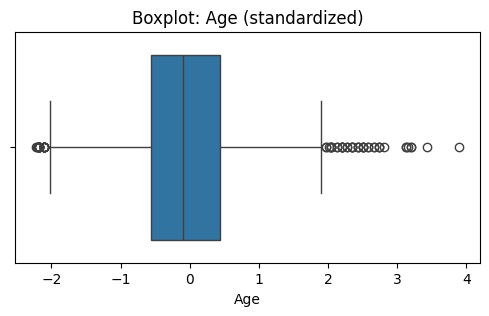

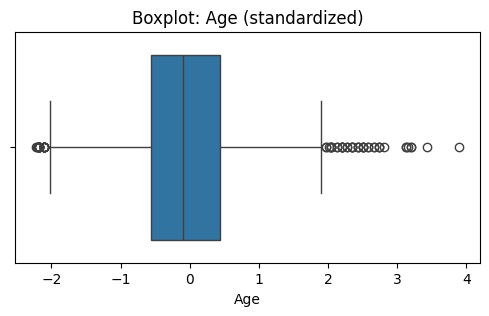

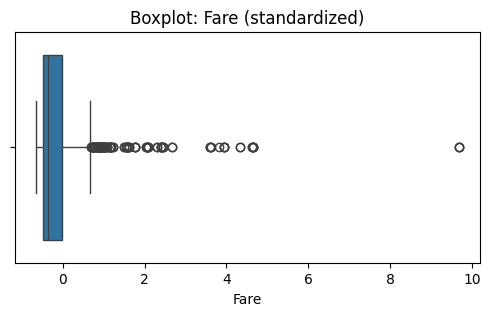

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age boxplot
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Age'])
plt.title("Boxplot: Age (standardized)")
plt.show()

# Age boxplot
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Age'])
plt.title("Boxplot: Age (standardized)")
plt.show()

# Fare boxplot
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Fare'])
plt.title("Boxplot: Fare (standardized)")
plt.show()


In [23]:
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Remove outliers for 'Age' and 'Fare'
df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)


In [24]:
df.to_csv("Titanic-Cleaned.csv", index=False)
print(df.head())
print(df.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            3         1       3   
2            4         1       1   
3            5         0       3   
4            6         0       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    0 -0.565736      1      0   
1                        Heikkinen, Miss. Laina    1 -0.258337      0      0   
2  Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.433312      1      0   
3                      Allen, Mr. William Henry    0  0.433312      0      0   
4                              Moran, Mr. James    0 -0.104637      0      0   

             Ticket      Fare  Cabin_missing  Emb_Q  Emb_S  
0         A/5 21171 -0.502445              1  False   True  
1  STON/O2. 3101282 -0.488854              1  False   True  
2            113803  0.420730              0  False   True  
3            373450 -0.486337              1  False   True